In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

### Function definitions

In [2]:
def load_data():
    df = pd.read_csv(f'Bergtal UW W&Q.csv', sep=';')
    df['datetime'] = pd.to_datetime(df['Date_time'] + ' ' + df['Time'], format='mixed', dayfirst=True, errors='coerce')
    df.set_index('datetime', inplace=True)
    df.drop(columns=['Date_time', 'Time', 'Station_id', 'Sensor_id', 'Time_in_Hrs'], inplace=True)
    df.index.name = None
    df['Water_level'] = pd.to_numeric((df['Water_level'].astype(str).str.replace(',', '.', regex=False)), errors='coerce').dropna().values.astype(float)
    df['Flow_rate'] = pd.to_numeric((df['Flow_rate'].astype(str).str.replace(',', '.', regex=False)), errors='coerce').dropna().values.astype(float)
    return df

def plot_flood(df, threshold):
    plt.plot(df['Flow_rate'])
    plt.xticks(rotation=45)
    plt.xlabel("Time")
    plt.ylabel("Flow Rate (m³/s)")
    plt.title(f"Flow Rate (threshold = {threshold} m³/s)")
    plt.show();

def plot_density(df, title):
    kde = gaussian_kde(df['Flow_rate'])
    x_vals = np.linspace(df['Flow_rate'].min() - 1, df['Flow_rate'].max() + 1, 500)
    y_vals = kde(x_vals)
    plt.plot(x_vals, y_vals)
    plt.fill_between(x_vals, y_vals, alpha=0.3)
    plt.xlabel("Flow Rate (m³/s)")
    plt.ylabel("Density")
    plt.title(title)
    #plt.xlim(0, 10)
    plt.show();

def plot_deviation(df, threshold, title):
    plt.plot(df['Flow_rate'] - threshold)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.ylabel('Exceedance (m³/s)')
    plt.xlabel('Time');

### Load data

In [3]:
df = load_data()
df

,Water_level,Flow_rate
2011-08-01 00:15:00,14.9,0.01
2011-08-01 00:30:00,14.9,0.01
2011-08-01 00:45:00,14.9,0.01
2011-08-01 01:00:00,14.9,0.01
2011-08-01 01:15:00,14.9,0.01
...,...,...
2023-08-31 23:00:00,20.7,0.05
2023-08-31 23:15:00,20.6,0.05
2023-08-31 23:30:00,20.6,0.05
2023-08-31 23:45:00,20.6,0.05


In [4]:
df['Flow_rate'].describe()

count    423744.000000
mean          0.023140
std           0.082193
min           0.000000
25%           0.010000
50%           0.020000
75%           0.020000
max           9.140000
Name: Flow_rate, dtype: float64

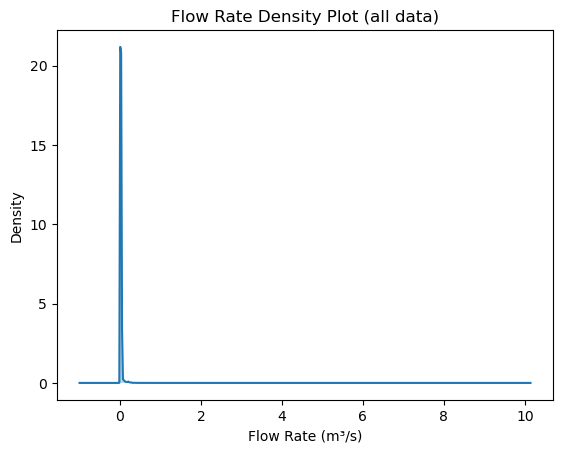

In [5]:
plot_density(df, f"Flow Rate Density Plot (all data)")

In [ ]:
""" fig, axes = plt.subplots(1, 2, figsize=(18,5))
sns.kdeplot(df['Flow_rate'], fill=True, ax=axes[0]) # Density Plot
axes[0].set_title("Density Plot")
axes[0].set_xlabel("Flow Rate")
axes[0].set_ylabel("Density")
sns.histplot(df['Flow_rate'], bins=30, kde=True, ax=axes[1]) # Histogram
axes[1].set_title("Histogram")
axes[1].set_xlabel("Flow Rate")
axes[1].set_ylabel("Frequency") """

### Flood event (threshold = 3 m³)

In [7]:
max_threshold = 3
flood = df[df['Flow_rate'] >= max_threshold]
flood

,Water_level,Flow_rate
2017-07-25 14:30:00,77.3,3.74
2017-07-25 16:00:00,76.5,3.67
2017-07-26 01:45:00,78.7,3.86
2017-07-26 02:00:00,86.8,4.61
2017-07-26 02:15:00,87.8,4.70
...,...,...
2017-07-26 22:45:00,78.9,3.88
2017-07-26 23:00:00,79.1,3.90
2017-07-26 23:15:00,79.1,3.90
2017-07-26 23:30:00,78.7,3.86


In [8]:
flood.describe()

,Water_level,Flow_rate
count,84.000000,84.000000
mean,90.960714,5.057024
std,10.150008,1.069064
min,76.500000,3.670000
25%,84.250000,4.365000
50%,89.550000,4.875000
75%,94.250000,5.345000
max,127.000000,9.140000


Volume (m³): 382311.0
Required size of cubic storage (m): 72.58


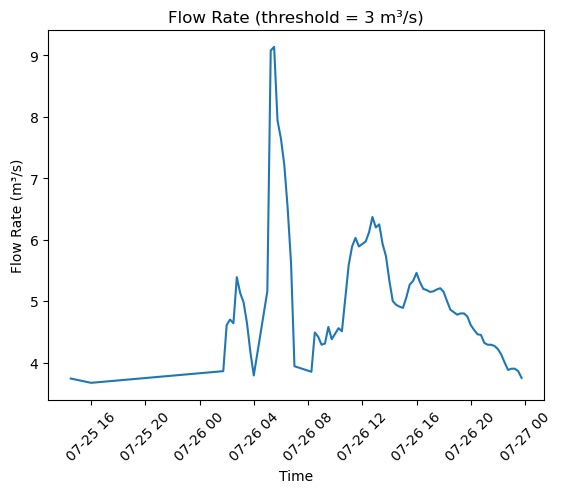

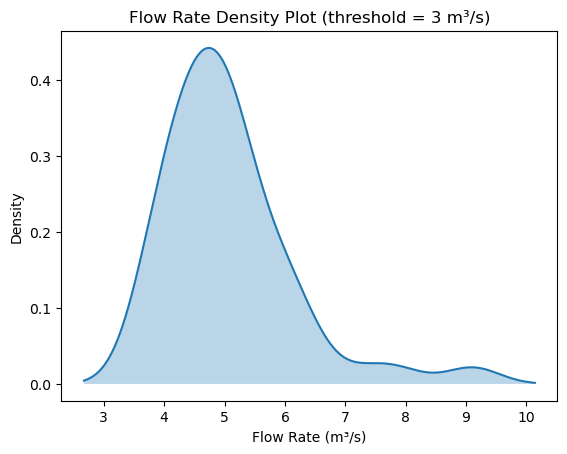

In [9]:
vol = np.sum(flood['Flow_rate']*15*60)
print('Volume (m³):',vol)
print('Required size of cubic storage (m):',np.round((vol**(1/3)),2))
plot_flood(flood, max_threshold)
plot_density(flood, f"Flow Rate Density Plot (threshold = {max_threshold} m³/s)")

### Flood event (threshold = 2 m³)

In [10]:
threshold = 2
flood2 = df[df['Flow_rate'] >= threshold]
flood2

,Water_level,Flow_rate
2017-07-25 06:45:00,69.2,2.07
2017-07-25 07:00:00,70.1,2.15
2017-07-25 14:00:00,70.4,2.17
2017-07-25 14:15:00,75.8,2.70
2017-07-25 14:30:00,77.3,3.74
...,...,...
2017-07-27 02:00:00,71.9,2.31
2017-07-27 02:15:00,71.9,2.31
2017-07-27 02:30:00,71.5,2.28
2017-07-27 02:45:00,70.6,2.19


In [11]:
flood2.describe()

,Water_level,Flow_rate
count,111.000000,111.000000
mean,86.383784,4.396667
std,12.022090,1.496954
min,68.600000,2.010000
25%,76.900000,3.705000
50%,86.000000,4.530000
75%,92.650000,5.185000
max,127.000000,9.140000


Volume (m³): 439227.0
Required size of cubic storage (m): 76.01


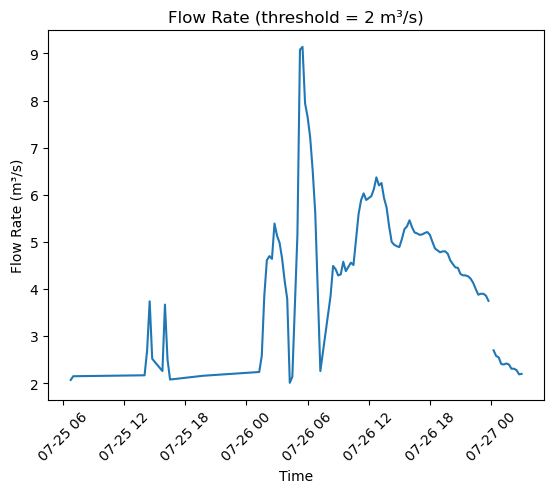

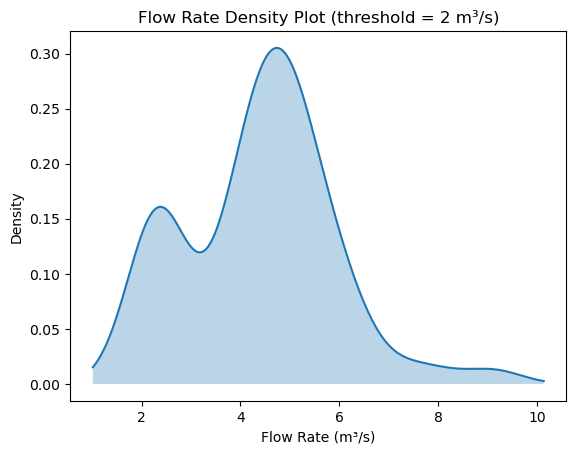

In [12]:
vol2 = np.sum(flood2['Flow_rate']*15*60)
print('Volume (m³):',vol2)
print('Required size of cubic storage (m):',np.round((vol2**(1/3)),2))
plot_flood(flood2, threshold)
plot_density(flood2, f"Flow Rate Density Plot (threshold = {threshold} m³/s)")

### Required Storage Volume Over Time

Volume (m³): 146781.0
Required size of cubic storage (m): 52.75


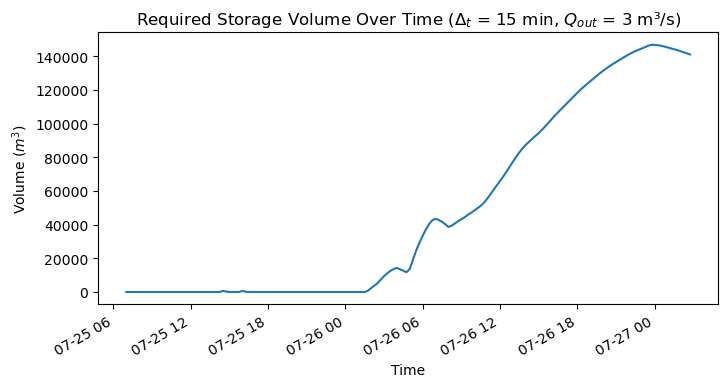

In [13]:
event = df[df.index > '2017-07-25 06:45:00']
event = event[event.index < '2017-07-27 03:00:00']
inflow = event['Flow_rate'] - 3
store = 0
store_history = []
for i in inflow:
    store = store + (i*15*60)
    if store < 0:
        store = 0
    store_history.append(store)

print('Volume (m³):',np.max(store_history))
print('Required size of cubic storage (m):',np.round(np.max(store_history)**(1/3),3))
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(event.index, store_history)
ax.set_title('Required Storage Volume Over Time ($Δ_{t}$ = 15 min, $Q_{out}$ = 3 m³/s)')
ax.set_xlabel('Time')
ax.set_ylabel('Volume ($m^{3}$)')
fig.autofmt_xdate()

### Deviation from threshold

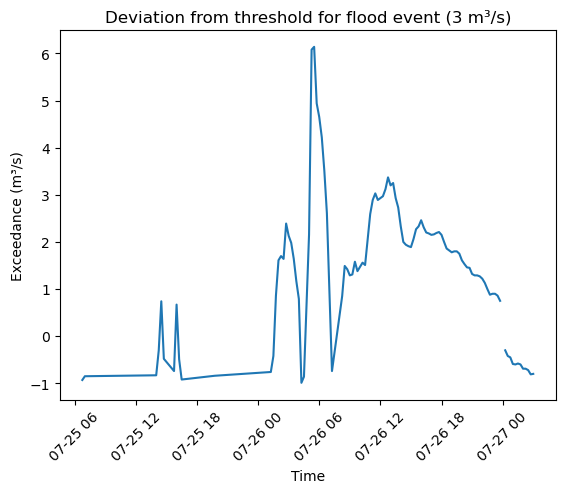

In [14]:
plot_deviation(flood2, max_threshold, f'Deviation from threshold for flood event ({max_threshold} m³/s)')

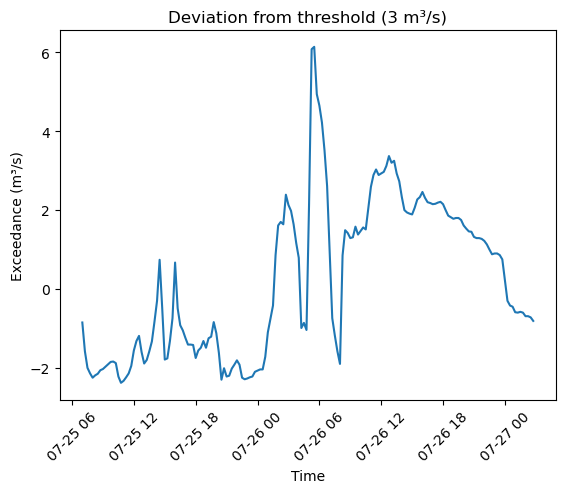

In [15]:
plot_deviation(event, max_threshold, f'Deviation from threshold ({max_threshold} m³/s)')